In [1]:
%load_ext lab_black

# Plotting with Matplotlib

Credits to Ben Root and the [Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib) tutorial on which this document is based.

## Introduction
Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes. First, allow for interactive, cross-platform control of figures and plots, and second, to make it very easy to produce static raster or vector graphics files without the need for any GUIs. Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

### Gallery
Many users of Matplotlib are often faced with the question, "I want to make a figure that has X with Y in the same figure, but it needs to look like Z". Good luck getting an answer from a web search with that query! This is why the [gallery](http://matplotlib.org/gallery.html) is so useful, because it showcases the variety of ways one can make figures. Browse through the gallery, click on any figure that has pieces of what you want to see and the code that generated it. Soon enough, you will be like a chef, mixing and matching components to produce your masterpiece!

As always, if you have a new and interesting plot that demonstrates a feature of Matplotlib, feel free to submit a concise, well-commented version of the code for inclusion in the gallery.

In [1]:
from IPython.display import IFrame

IFrame(
    "https://matplotlib.org/gallery.html#lines_bars_and_markers",
    width="100%",
    height=500,
)

## Getting Help
### StackOverflow
Another community resource is [StackOverflow](http://stackoverflow.com/questions/tagged/matplotlib), so if you need to build up karma points, submit your questions here, and help others out too!

### Github repository
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub. If you think you found a bug, you can also submit an issue there.



## Quick note on "backends" and Jupyter notebooks
Matplotlib has multiple backends. The backends allow mpl to be used on a variety of platforms with a variety of GUI toolkits (GTK, Qt, Wx, etc.), all of them written so that most of the time, you will not need to care which backend you are using. 

In [1]:
import matplotlib

print(matplotlib.__version__)
print(matplotlib.get_backend())

3.0.3
module://ipykernel.pylab.backend_inline


Normally we wouldn't need to think about this too much, but IPython/Jupyter notebooks behave a touch differently than "normal" python. In JupyterLab notebooks we 
either want to use the `inline` backend, to statically embed figures in the notebook or use the `widget` backend to get interactive figures. 


We can do this in two ways:

1. The IPython ``%matplotlib backend_name`` "magic" command (or ``plt.ion()``, which behaves similarly)
   - Figures will be shown automatically by IPython, even if you don't call ``plt.show()``.
     
2. ``matplotlib.use("backend_name")``
   - Figures will only be shown when you call ``plt.show()``.

Here, we'll use the first method since the interactive inline display does not yet work in jupyter lab (it works perfectly in the pure notebook). However, we still use `plt.show()` 
to demonstrate how the code would look inside a plain python script.

For now let's use the `inline` backend.

In [2]:
%matplotlib inline

# Anatomy of a "Plot"
Matplotlib is a large project and can seem daunting at first. However, by learning the components, it should begin to feel much smaller and more approachable.

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="images/figure_axes_axis_labeled.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it is worth mentioning here to explain where the term ``Axes`` comes from.


## Getting Started

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Awww, nothing happened! This is because by default mpl will not show anything until told to do so, as we mentioned earlier in the "backend" discussion.

Instead, we'll need to call ``plt.show()``

In [5]:
plt.show()

Still nothing. That is because the notebook does not want to show empty figures. In a plain python script, you would actually get an empty figure here. To actually see the figure in the notebook, we need to add some axes...

## Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

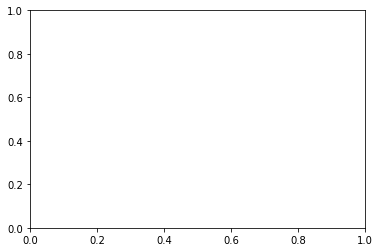

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.show()

You can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A really useful utility function is [`figaspect`](http://matplotlib.org/api/figure_api.html?highlight=figaspect#matplotlib.figure.figaspect)

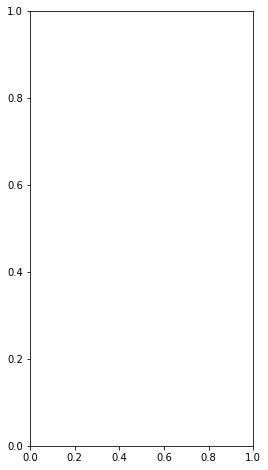

In [7]:
fig = plt.figure(figsize=plt.figaspect(2.0))  # Twice as high as wide.
ax = fig.add_subplot(111)
plt.show()

Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

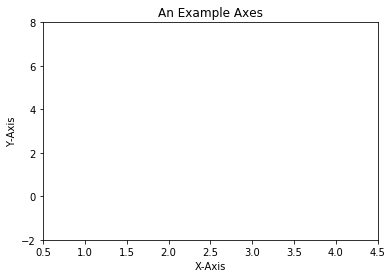

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title("An Example Axes")
ax.set_ylabel("Y-Axis")
ax.set_xlabel("X-Axis")
plt.show()

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

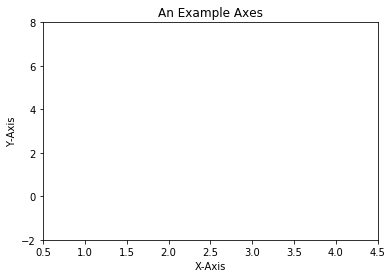

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(
    xlim=[0.5, 4.5], 
    ylim=[-2, 8], 
    title='An Example Axes',
    ylabel='Y-Axis', 
    xlabel='X-Axis',
)
plt.show()

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

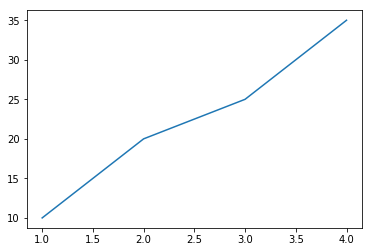

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show()

## Axes methods (object oriented interface) vs. pyplot (state machine interface)

Interestingly, just about all methods of an `Axes` object exist as a function in the `pyplot` module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `ax.set_xlim(1, 10)` on whichever `Axes` is *current*. Here is an equivalent version of the above example using just `pyplot`.

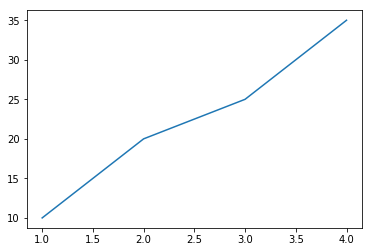

In [11]:
plt.figure()
plt.plot([1, 2, 3, 4], [10, 20, 25, 35])
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

In [12]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

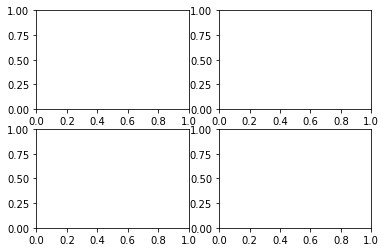

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

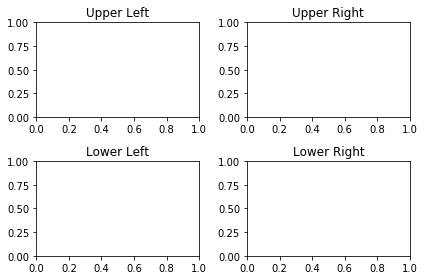

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()

plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

Speaking of titles, you can also set a supertitle for an entire figure.

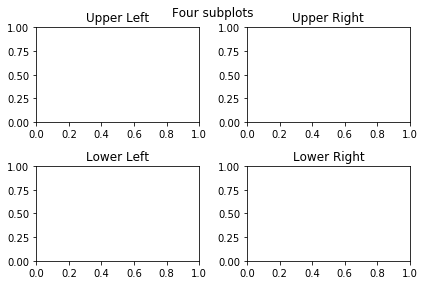

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].set(title="Upper Left")
axes[0, 1].set(title="Upper Right")
axes[1, 0].set(title="Lower Left")
axes[1, 1].set(title="Lower Right")

# tight_layout makes sure titles and tick labels do not overlap.
fig.tight_layout()
fig.suptitle("Four subplots")

plt.show()

## Exercise
Can you reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

In [16]:
# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ["Signal 1", "Signal 2", "Signal 3"]

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?

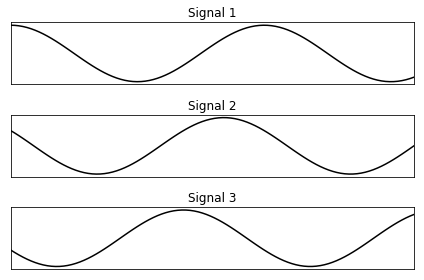

In [17]:
fig, axes = plt.subplots(nrows=3)

for ax, y, name in zip(axes, [y1, y2, y3], names):
    ax.plot(x, y, color="black")
    ax.set(xticks=[], yticks=[], title=name, xlim=[x.min(), x.max()])

plt.tight_layout()
plt.show()

# Plotting Functions

We've talked a lot about laying things out, etc, but we haven't talked about actually plotting data yet. Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

## The Basics: 1D series/points

<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## 2D Arrays and Images
<a href="examples/imshow_example.py"><img src="images/imshow_example.png"></a>
<a href="examples/pcolor_example.py"><img src="images/pcolor_example.png"></a>
<a href="examples/contour_example.py"><img src="images/contour_example.png"></a>

## Vector Fields
<a href="examples/vector_example.py"><img src="images/vector_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

## Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

### Simple bar plot

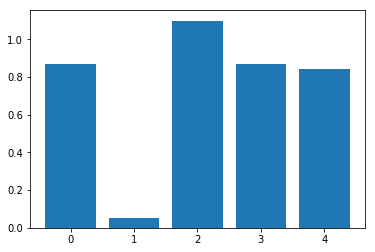

In [18]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2

fig, ax = plt.subplots()
ax.bar(x, y)
plt.show()

Adding errorbars...

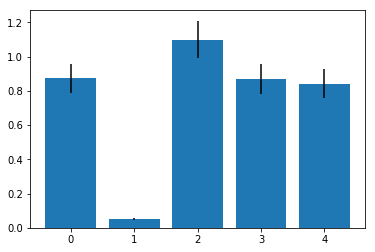

In [19]:
np.random.seed(2)
x = np.arange(5)
y = np.random.random(5) * 2
error = y * 0.1

fig, ax = plt.subplots()
ax.bar(x, y, yerr=error)
plt.show()

If we have negative values, we can use `axhline` to draw an axis "spine" to mark the zero line.

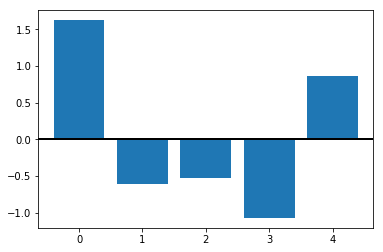

In [20]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, ax = plt.subplots()
ax.bar(x, y)
ax.axhline(y=0, color='black', linewidth=2)
plt.show()

Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

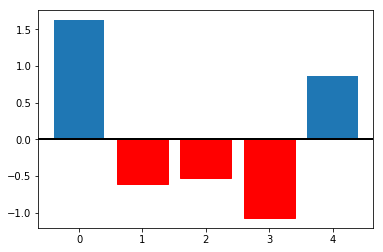

In [21]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y) # Store the output of the call to .bar

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(color='red')
        
ax.axhline(y=0, color='black', linewidth=2)

plt.show()

Looking at the artist returned by `ax.bar` we can see that they are all plain rectangles.

In [22]:
for bar in vert_bars:
    print(bar)

Rectangle(xy=(-0.4, 0), width=0.8, height=1.62435, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=-0.611756, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=-0.528172, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=-1.07297, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=0.865408, angle=0)


### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

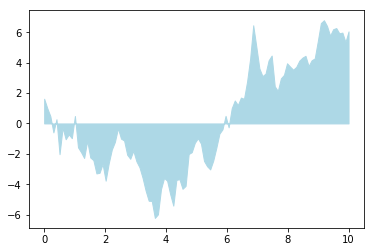

In [23]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

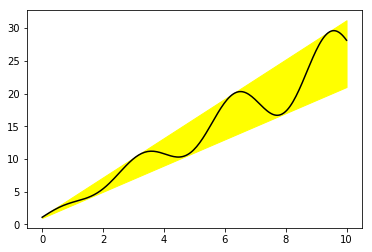

In [24]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

plt.show()

### `data` keyword argument
When using specialized data structures such as Pandas DataFrame and XArray, the input data to be plotted are accessed like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the `data` keyword argument was added to many of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

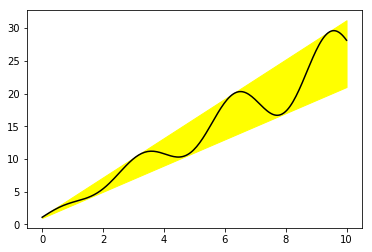

In [25]:
x = np.linspace(0, 10, 200)
data_obj = {
    "x": x,
    "y1": 2 * x + 1,
    "y2": 3 * x + 1.2,
    "mean": 0.5 * x * np.cos(2 * x) + 2.5 * x + 1.1,
}

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between("x", "y1", "y2", color="yellow", data=data_obj)

# Plot the "centerline" with `plot`
ax.plot("x", "mean", color="black", data=data_obj)

plt.show()

## Input Data: 2D Arrays or Images

There are several options for plotting 2D datasets.  `imshow`, `pcolor`, and `pcolormesh` have a lot of overlap, at first glance.  The image above is meant to clarify that somewhat.


In short, `imshow` can interpolate and display large arrays very quickly, while `pcolormesh` and `pcolor` are much slower, but can handle flexible (i.e. more than just rectangular) arrangements of cells.

We won't dwell too much on the differences and overlaps here.  They have overlapping capabilities, but different default behavior because their primary use-cases are a bit different (there's also `matshow`, which is `imshow` with different defaults).  

Instead we'll focus on what they have in common.

`imshow`, `pcolor`, `pcolormesh`, `scatter`, and any other Matplotlib plotting methods that map a range of data values onto a colormap will return artists that are instances of `ScalarMappable.`  In practice, what that means is a) you can display a colorbar for them, and b) they share several keyword arguments.

### Displaying 2d data with `imshow`

In [26]:
arr_2d = np.arange(9).reshape((3, 3))
arr_2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

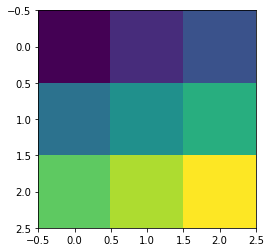

In [27]:
fig, ax = plt.subplots()
ax.imshow(arr_2d)
plt.show()

`imshow` is used most of the times to display images.

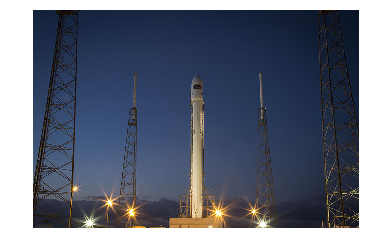

In [28]:
# Read images into numpy array. Usually imageio would be used here.
# see https://imageio.github.io/
img = plt.imread("images/rocket.png")

fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off")
plt.show()

For visualizing matrices, `matshow` provides better defaults, e.g. axis labelling.

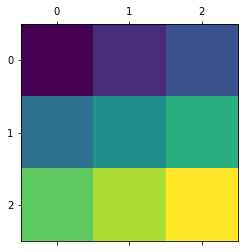

In [29]:
fig, ax = plt.subplots()
ax.matshow(arr_2d)
plt.show()

### Colorbars

Just seeing the colors does not necessarily tell us something about the values beneath. Let's add a colorbar to the figure to display what colors correspond to values of `data` we've plotted. 

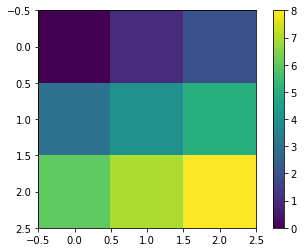

In [30]:
fig, ax = plt.subplots()
im = ax.imshow(arr_2d)
fig.colorbar(im)
plt.show()

You may notice that `colorbar` is a `Figure` method and not an `Axes` method.  That's because `colorbar` doesn't operate on the axes. Instead, it shrinks the current axes by a bit, adds a _new_ axes to the figure, and places the colorbar on that axes.

The new axes that `fig.colorbar` creates is fairly limited in where it can be positioned.   For example, it's always outside the axes it "steals" room from. Sometimes you may want to avoid "stealing" room from an axes or maybe even have the colorbar _inside_ another axes.  In that case, you can manually create the axes for the colorbar and position it where you'd like:

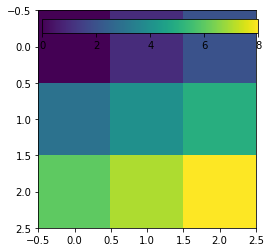

In [31]:
fig, ax = plt.subplots()
cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])

im = ax.imshow(arr_2d)
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

As an example of that, let's use a divergent colormap on some example data. We'll also use `interpolation="nearest"` to "turn off" interpolation of the cells in the input dataset. Note how the colormap is **not** centered at zero.

In [32]:
from matplotlib.cbook import get_sample_data
data = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic')
fig.colorbar(im)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/jarno/.miniconda/envs/scientific_programming/lib/python3.7/site-packages/matplotlib/mpl-data/sample_data/axes_grid/bivariate_normal.npy'

NameError: name 'data' is not defined

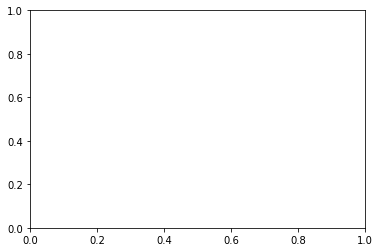

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='seismic',
               vmin=-2, vmax=2)
fig.colorbar(im)
plt.show()

### Exercise
`vmin` and `vmax` are also very useful when we want multiple plots to share one colorbar, as our next exercise will do.

Can you reproduce this figure?
<img src="images/exercise_2.2-vmin_vmax_imshow_and_colorbars.png">

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout()  # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03])  # Add an axes for the colorbar

# Now you're on your own!

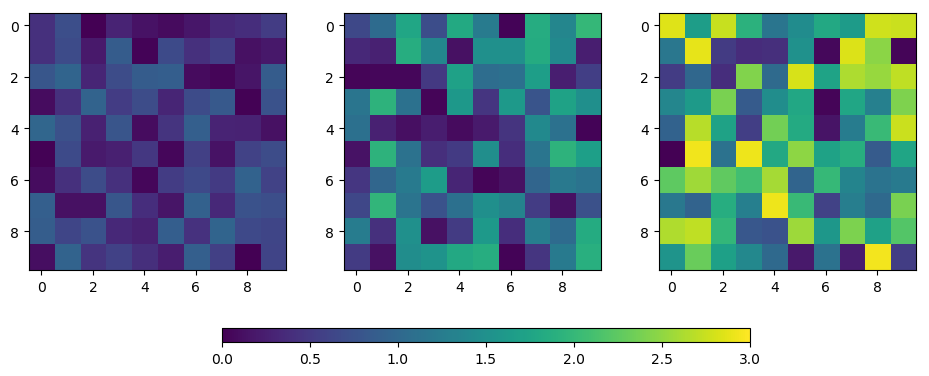

In [42]:
for ax, data in zip(axes.flat, [data1, data2, data3]):
    im = ax.imshow(data, vmin=0, vmax=3)
    
fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()

## Scatter for n dimensional data
`scatter` allows to map several dimensions to different aesthetics such as x-postion, color, size and shape.

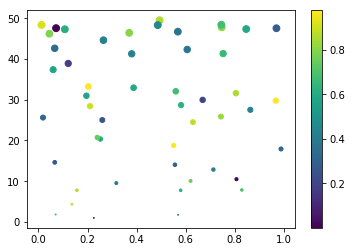

In [32]:
n = 50
x1 = np.random.random(n)
x2 = np.random.random(n) * 50
x3 = np.random.random(n)

y = x1 + x2 + x3
fig, ax = plt.subplots()
sc = ax.scatter(x=x1, y=y, s=x2, c=x3, marker='o')
fig.colorbar(sc)
plt.show()

## Visualizing statistical distributions

Draw samples from a normal distribution.

In [44]:
μ = 0
σ = 1
num_samples = 1000
dist = np.random.normal(μ, σ, num_samples)

**Side note on unicode characters as variables.** Since Python 3 we can use any unicode character such as μ and σ as variables. This can make sense in scientific programming if strong naming conventions exist. A good example is mean and standard deviation of a normal distribution. To easily obtain common characters you can use latex style and type e.g. `\mu` followed by <kbd>tab</kbd> to obtain μ. However, do not overuse this. Clearly named characters are often easier to read.

### Histograms
The standard histogram.

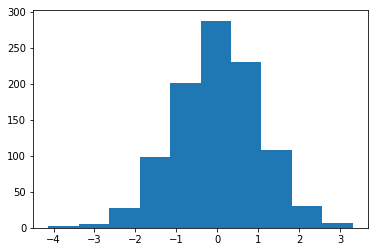

In [36]:
fig, ax = plt.subplots()
ax.hist(dist)
plt.show()

A histogram with more bins.

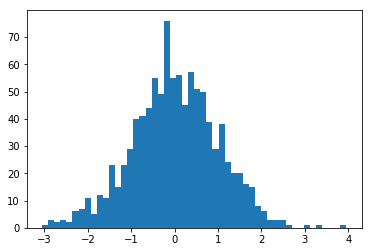

In [35]:
fig, ax = plt.subplots()
ax.hist(dist, bins=50)
plt.show()

A histogram with an automatic number of bins.

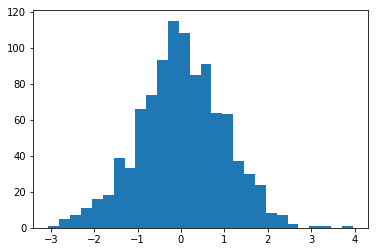

In [36]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto')
plt.show()

Using `density=True` will create a normalized histogram that can be interpreted as probability density. 

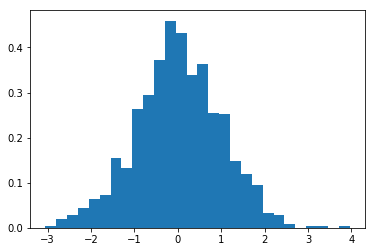

In [37]:
fig, ax = plt.subplots()
ax.hist(dist, bins='auto', density=True)
plt.show()

### Boxplots

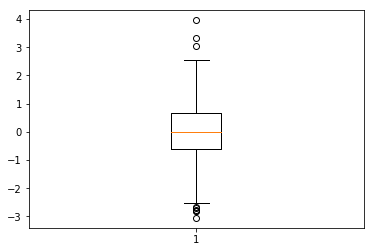

In [38]:
fig, ax = plt.subplots()
ax.boxplot(dist)
plt.show()

Box plots have a lot of customization options.

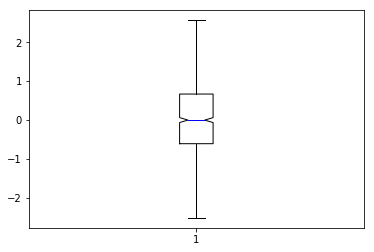

In [39]:
fig, ax = plt.subplots()
ax.boxplot(dist, notch=True, showfliers=False,
           medianprops={'color': 'blue'}, widths=0.1)
plt.show()

In [40]:
import reprlib # This is for obtaining printable versions of large data sets.
means = [0, -1, 2.5, 4.3, -3.6]
sigmas = [1.2, 5, 3, 1.5, 2]
# Each distribution has a different number of samples.
nums = [150, 1000, 100, 200, 500]

dists = [np.random.normal(*args) for args in zip(means, sigmas, nums)]
reprlib.repr(dists)

'[array([ 1.051...23276943e-01]), array([ 2.996...56217073e+00]), array([ 5.861...  3.13430491]), array([1.0326..., 3.01359952]), array([-4.157...83776857e-01])]'

`Boxplot` can also be used to display several distributions at once.

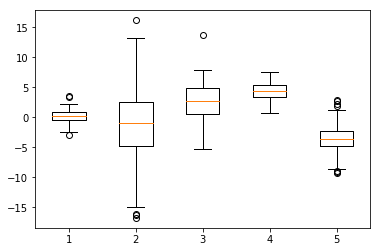

In [41]:
fig, ax = plt.subplots()
ax.boxplot(dists)
plt.show()

### Violinplots
Violinplots behave almost the same.

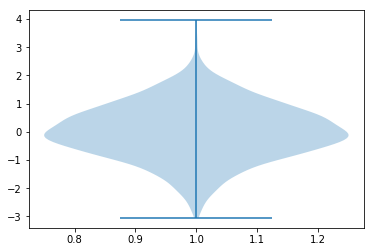

In [42]:
fig, ax = plt.subplots()
ax.violinplot(dist)
plt.show()

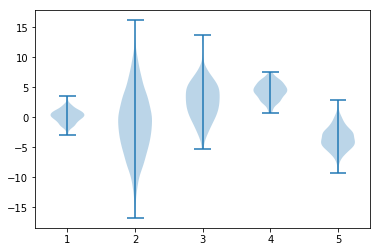

In [43]:
fig, ax = plt.subplots()
ax.violinplot(dists)
plt.show()

### Pie charts
Pie charts a well known way to visualize categorical distributions.

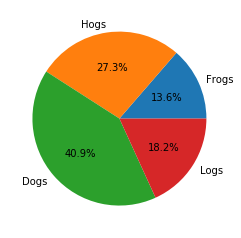

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

We will cover more advanced and more convenient methods for statistical visualization in a later lecture.

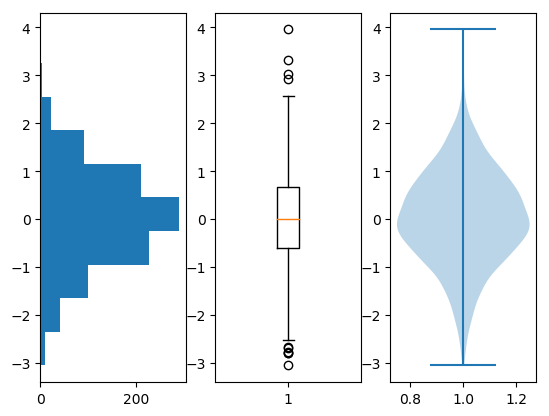

In [49]:
fig, axes = plt.subplots(ncols=3)
axes[0].hist(dist, orientation="horizontal")
axes[1].boxplot(dist)
axes[2].violinplot(dist)
plt.show()

# How to speak "MPL"
In the previous parts, you learned how Matplotlib organizes plot-making by figures and axes. We broke down the components of a basic figure and learned how to create them. You also learned how to add one or more axes to a figure, and how to tie them together. You even learned how to change some of the basic appearances of the axes. Finally, we went over some of the many plotting methods that Matplotlib has to draw on those axes. With all that knowledge, you should be off making great and wonderful figures.

Why are you still here?

"We don't know how to control our plots and figures!" says some random voice in the back of the room.

Of course! While the previous sections may have taught you some of the structure and syntax of Matplotlib, it did not describe much of the substance and vocabulary of the library. This section will go over many of the properties that are used throughout the library. Note that while many of the examples in this section may show one way of setting a particular property, that property may be applicible elsewhere in completely different context. This is the "language" of Matplotlib.

## Colors
This is, perhaps, the most important piece of vocabulary in Matplotlib. Given that Matplotlib is a plotting library, colors are associated with everything that is plotted in your figures. Matplotlib supports a [very robust language](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors) for specifying colors that should be familiar to a wide variety of users.

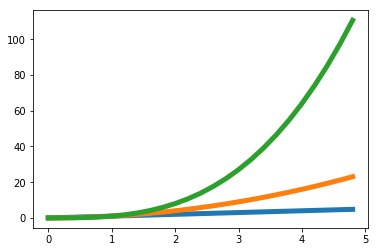

In [45]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5)
ax.plot(t, t**2, linewidth=5)
ax.plot(t, t**3, linewidth=5)
plt.show()

### Colornames
First, colors can be given as strings. For very basic colors, you can even get away with just a single letter:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Other colornames that are allowed are the HTML/CSS colornames such as "burlywood" and "chartreuse". See the [full list](https://www.w3schools.com/colors/colors_names.asp) of the 147 colornames. For the British speaking and poor spellers among us (I am not implying that British speakers are poor spellers!), we allow "grey" where-ever "gray" appears in that list of colornames. All of these colornames are case-insensitive.

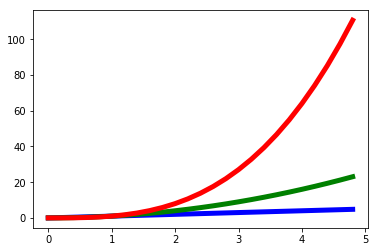

In [46]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='blue')
ax.plot(t, t**2, linewidth=5, color='g')
ax.plot(t, t**3, linewidth=5, color='red')
plt.show()

### Hex values
Colors can also be specified by supplying a HTML/CSS hex string, such as `'#0000FF'` for blue. Support for an optional alpha channel was added for v2.0.



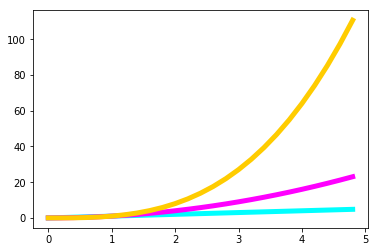

In [47]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='#00ffff')
ax.plot(t, t**2, linewidth=5, color='#ff00ff')
ax.plot(t, t**3, linewidth=5, color='#ffcc00')
plt.show()

### 256 Shades of Gray
A gray level can be given instead of a color by passing a string representation of a number between 0 and 1, inclusive. `'0.0'` is black, while `'1.0'` is white. `'0.75'` would be a light shade of gray.


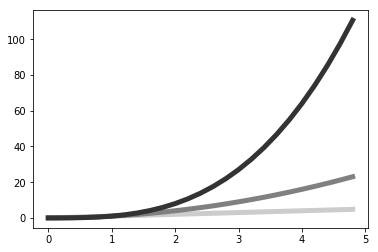

In [48]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='0.8')
ax.plot(t, t**2, linewidth=5, color='0.5')
ax.plot(t, t**3, linewidth=5, color='0.2')
plt.show()

### RGB[A] tuples
You may come upon instances where the previous ways of specifying colors do not work. This can sometimes happen in some of the deeper, stranger levels of the library. When all else fails, the universal language of colors for matplotlib is the RGB[A] tuple. This is the "Red", "Green", "Blue", and sometimes "Alpha" tuple of floats in the range of [0, 1]. One means full saturation of that channel, so a red RGBA tuple would be `(1.0, 0.0, 0.0, 1.0)`, whereas a partly transparent green RGBA tuple would be `(0.0, 1.0, 0.0, 0.75)`.  The documentation will usually specify whether it accepts RGB or RGBA tuples. Sometimes, a list of tuples would be required for multiple colors, and you can even supply a Nx3 or Nx4 numpy array in such cases.

In functions such as `plot()` and `scatter()`, while it may appear that they can take a color specification, what they really need is a "format specification", which includes color as part of the format. Unfortunately, such specifications are string only and so RGB[A] tuples are not supported for such arguments (but you can still pass an RGB[A] tuple for a "color" argument).

Oftentimes there is a separate argument for "alpha" where-ever you can specify a color. The value for "alpha" will usually take precedence over the alpha value in the RGBA tuple. There is no easy way around this inconsistency.

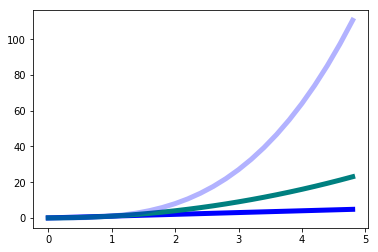

In [49]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color=(0, 0, 1))
ax.plot(t, t**2, linewidth=5, color=(0, 0.5, 0.5))
ax.plot(t, t**3, linewidth=5, color=(0, 0, 1, 0.3))
plt.show()

### Cycle references
With the advent of fancier color cycles coming from the many available styles, users needed a way to reference those colors in the style without explicitly knowing what they are. So, in v2.0, the ability to reference the first 10 iterations of the color cycle was added. Whereever one could specify a color, you can supply a 2 character string of 'C#'. So, 'C0' would be the first color, 'C1' would be the second, and so on and so forth up to 'C9'.

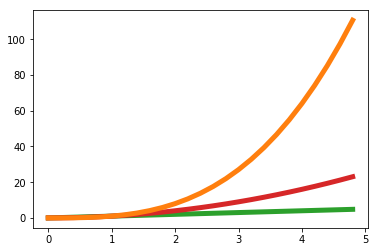

In [50]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, linewidth=5, color='C2')
ax.plot(t, t**2, linewidth=5, color='C3')
ax.plot(t, t**3, linewidth=5, color='C1')
plt.show()

## Markers
[Markers](http://matplotlib.org/api/markers_api.html) are commonly used in [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) and [`scatter()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) plots, but also show up elsewhere. There is a wide set of markers available, and custom markers can even be specified.

marker     |  description  | marker    |  description    |marker    |  description  | marker    |  description  
:----------|:--------------| :---------|:--------------  |:---------|:--------------| :---------|:--------------
"."        |  point        | "+"       |  plus           |","       |  pixel        | "x"       |  cross
"o"        |  circle       | "D"       |  diamond        |"d"       |  thin_diamond |           |
"8"        |  octagon      | "s"       |  square         |"p"       |  pentagon     | "\*"      |  star
"&#124;"   |  vertical line| "\_"      | horizontal line | "h"      |  hexagon1     | "H"       |  hexagon2
0          |  tickleft     | 4         |  caretleft      |"<"       | triangle_left | "3"       |  tri_left
1          |  tickright    | 5         |  caretright     |">"       | triangle_right| "4"       |  tri_right
2          |  tickup       | 6         |  caretup        |"^"       | triangle_up   | "2"       |  tri_up
3          |  tickdown     | 7         |  caretdown      |"v"       | triangle_down | "1"       |  tri_down
"None"     |  nothing      | `None`    |  default        |" "       |  nothing      |""         |  nothing


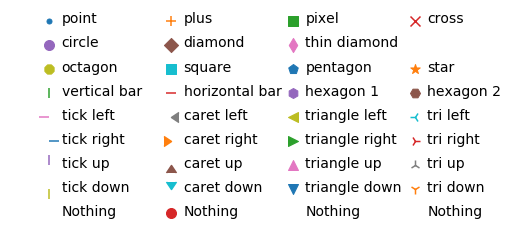

In [51]:
xs, ys = np.mgrid[:4, 9:0:-1]
markers = [".", "+", ",", "x", "o", "D", "d", "", "8", "s", "p", "*", "|", "_", "h", "H", 0, 4, "<", "3",
           1, 5, ">", "4", 2, 6, "^", "2", 3, 7, "v", "1", "None", None, " ", ""]
descripts = ["point", "plus", "pixel", "cross", "circle", "diamond", "thin diamond", "",
             "octagon", "square", "pentagon", "star", "vertical bar", "horizontal bar", "hexagon 1", "hexagon 2",
             "tick left", "caret left", "triangle left", "tri left", "tick right", "caret right", "triangle right", "tri right",
             "tick up", "caret up", "triangle up", "tri up", "tick down", "caret down", "triangle down", "tri down",
             "Nothing", "Nothing", "Nothing", "Nothing"]
fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
for x, y, m, d in zip(xs.T.flat, ys.T.flat, markers, descripts):
    ax.scatter(x, y, marker=m, s=100)
    ax.text(x + 0.1, y - 0.1, d, size=14)
ax.set_axis_off()
plt.show()

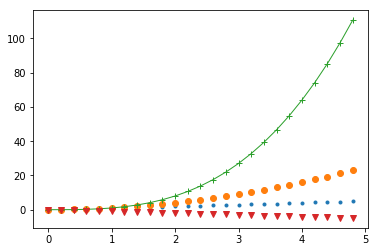

In [52]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '.', linewidth=5)
ax.plot(t, t**2, 'o', linewidth=5)
ax.plot(t, t**3, marker='+', linewidth=1) # With explicit arguments, you can set maker and linestyle separately.
ax.plot(t, -t, ls='', marker='v', linewidth=5) 
plt.show()

## Linestyles
Line styles are about as commonly used as colors. There are a few predefined linestyles available to use. Note that there are some advanced techniques to specify some custom line styles. [Here](http://matplotlib.org/1.3.0/examples/lines_bars_and_markers/line_demo_dash_control.html) is an example of a custom dash pattern.

linestyle          | description
-------------------|------------------------------
'-'                | solid
'--'               | dashed
'-.'               | dashdot
':'                | dotted
'None'             | draw nothing
' '                | draw nothing
''                 | draw nothing

Also, don't mix up ".-" (line with dot markers) and "-." (dash-dot line) when using the ``plot`` function!

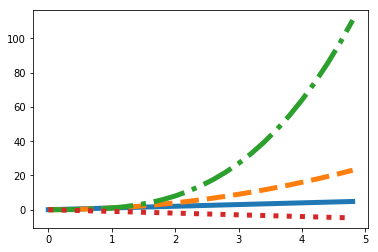

In [53]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, '-', linewidth=5)
ax.plot(t, t**2, '--', linewidth=5)
ax.plot(t, t**3, '-.', linewidth=5)
ax.plot(t, -t, linestyle=':', linewidth=5)
plt.show()

Many arguments have a short and a long name.

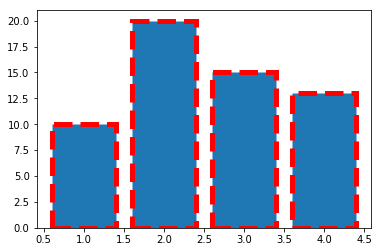

In [54]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], ls='--', ec='r', lw=5)
plt.show()

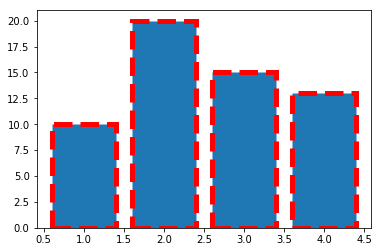

In [55]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 15, 13], linestyle='--', edgecolor='r', linewidth=5)
plt.show()

Everything combined in the `fmt` string. Color, marker and linestyle can be specified in a single `fmt` string argument in that order.

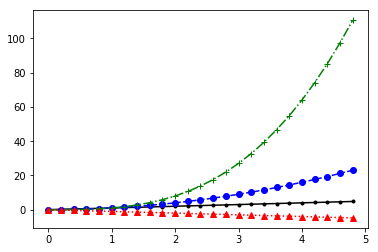

In [56]:
t = np.arange(0.0, 5.0, 0.2)
fig, ax = plt.subplots()
ax.plot(t, t, 'k.-')
ax.plot(t, t**2, 'bo--')
ax.plot(t, t**3, 'g+-.')
ax.plot(t, -t, 'r^:')
plt.show()

## Colormaps
Another very important property of many figures is the colormap. The job of a colormap is to relate a scalar value to a color. In addition to the regular portion of the colormap, an "over", "under" and "bad" color can be optionally defined as well. NaNs will trigger the "bad" part of the colormap.

As we all know, we create figures in order to convey information visually to our readers. There is much care and consideration that have gone into the design of these colormaps. Your choice in which colormap to use depends on what you are displaying. In mpl, the "jet" colormap has historically been used by default, but it will often not be the colormap you would want to use. Much discussion has taken place on the mailing lists with regards to what colormap should be default. The v2.0 release of Matplotlib adopted a new default colormap, 'viridis', along with some other stylistic changes to the defaults.

I want to acknowedge Nicolas Rougier and Tony Yu for putting significant effort in educating users in proper colormap selections. Furthermore, thanks goes to Nathaniel Smith and Stéfan van der Walt for developing the new perceptually uniform colormaps such as viridis. [Here is the talk](https://www.youtube.com/watch?v=xAoljeRJ3lU) they gave at SciPy 2015 that does an excelent job explaining colormaps.

Here is the full gallery of all the pre-defined colormaps, organized by the types of data they are usually used for.

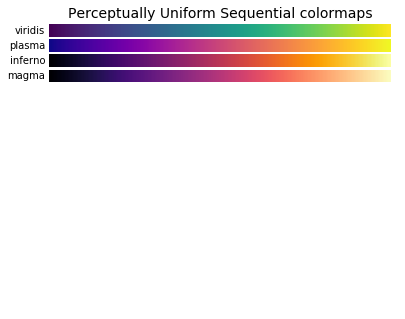

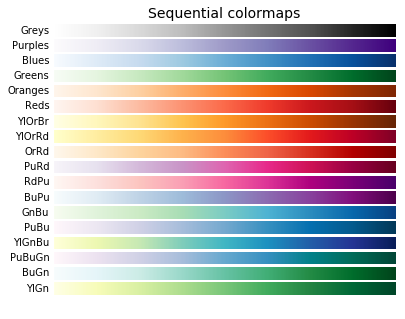

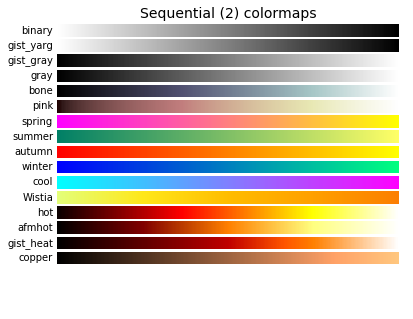

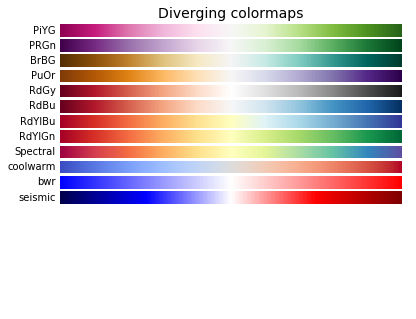

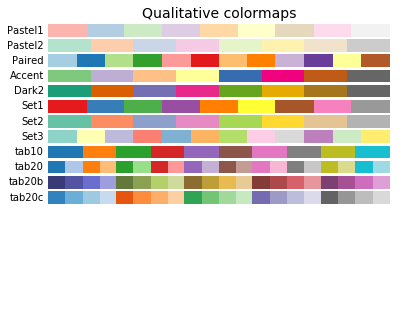

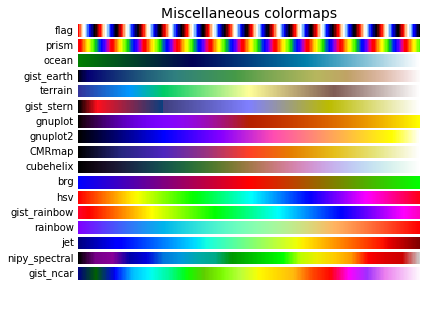

In [57]:
# %load http://matplotlib.org/mpl_examples/color/colormaps_reference.py
"""
==================
Colormap reference
==================

Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.

Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).

Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.

"""
import numpy as np
import matplotlib.pyplot as plt


# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]


nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()


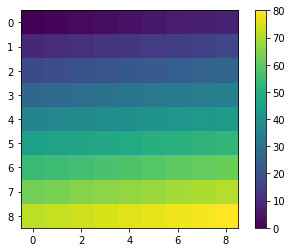

In [58]:
arr_2d = np.arange(81).reshape((9,9))

fig, ax = plt.subplots()
im = ax.imshow(arr_2d, cmap='viridis')
fig.colorbar(im)
plt.show()

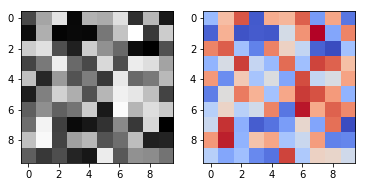

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2)
z = np.random.random((10, 10))
ax1.imshow(z, interpolation='none', cmap='gray')
ax2.imshow(z, interpolation='none', cmap='coolwarm')
plt.show()

## Mathtext
Oftentimes, you just simply need that superscript or some other math text in your labels. Matplotlib provides a very easy way to do this for those familiar with LaTeX. Any text that is surrounded by dollar signs will be treated as "[mathtext](http://matplotlib.org/users/mathtext.html#mathtext-tutorial)". Do note that because backslashes are prevelent in LaTeX, it is often a good idea to prepend an `r` to your string literal so that Python will not treat the backslashes as escape characters.

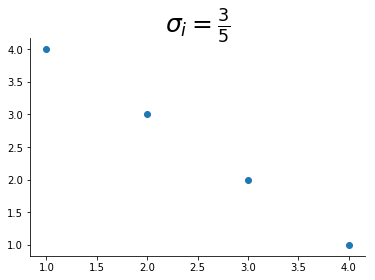

In [60]:
fig, ax = plt.subplots()
ax.scatter([1, 2, 3, 4], [4, 3, 2, 1])
ax.spines['top'].set(visible=False)  # Removing spines so they don't intersect with the title. tight_layout() is not sufficient here.
ax.spines['right'].set(visible=False)
ax.set_title(r'$\sigma_i=\frac{3}{5}$', fontsize=25)
plt.show()

## Property Cycles
In case you haven't noticed, when you do multiple plot calls in the same axes -- and not specify any colors -- the color for each plot is different! The default style in Matplotlib will cycle through a list of colors if you don't specify any. This feature has been in Matplotlib for a long time and it is similar to Matlab behavior.

In v1.5, this feature was extended so that one can cycle through other properties besides just color. Now, you can cycle linestyles, markers, hatch styles -- just about any property that can be specified is now possible to be cycled.


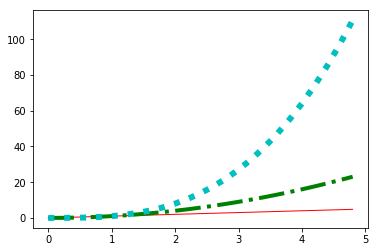

In [48]:
import matplotlib as mpl
from matplotlib.rcsetup import cycler
old_config = mpl.rcParams['axes.prop_cycle']


mpl.rc(
    'axes', prop_cycle=(cycler('color', 'rgc')
                        + cycler('lw', [1, 4, 6]) 
                        + cycler('linestyle', ['-', '-.', ':']))
)
t = np.arange(0.0, 5.0, 0.2)
plt.plot(t, t)
plt.plot(t, t**2)
plt.plot(t, t**3)
plt.show()
mpl.rc('axes', prop_cycle=old_config)

With `mpl.rc` you can do a lot of customization for default values.

# Limits, Legends and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

## Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

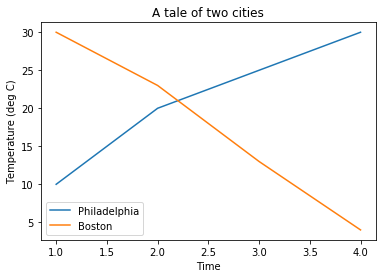

In [62]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

In `classic` mode, legends will go in the upper right corner by default (you can control this with the `loc` kwarg). As of v2.0, by default Matplotlib will choose a location to avoid overlapping plot elements as much as possible. To force this option, you can pass in:

    ax.legend(loc="best")
    
Also, if you happen to be plotting something that you do not want to appear in the legend, just do not set the label.

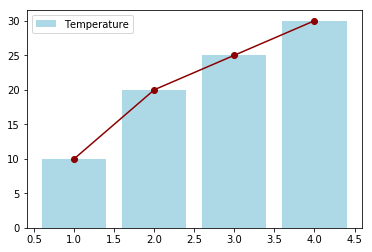

In [63]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 25, 30], label="Temperature", align='center', color='lightblue')
ax.plot([1, 2, 3, 4], [10, 20, 25, 30],  marker='o', color='darkred')
ax.legend()
plt.show()

## Limits and autoscaling

By default, Matplotlib will attempt to determine limits for you that encompasses all the data you have plotted.  This is the "autoscale" feature. For image plots, the limits are not padded while plots such as scatter plots and bar plots are given some padding.

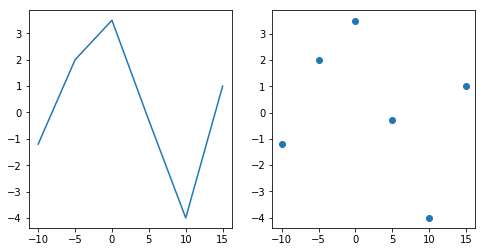

In [64]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

plt.show()

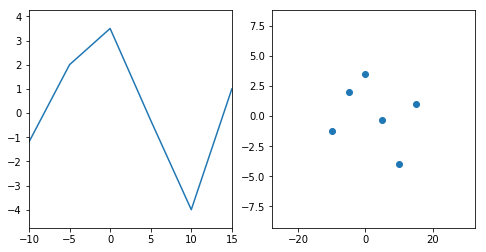

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.7) # 70% padding in all directions

plt.show()

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
However, you'll probably use `axis` mostly with either the `"tight"` or `"equal"` options. There are other options as well; see the documentation for full details.  In a nutshell, though:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

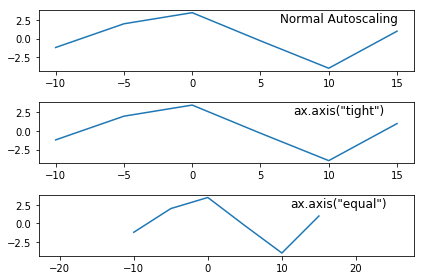

In [66]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

fig.tight_layout()
plt.show()

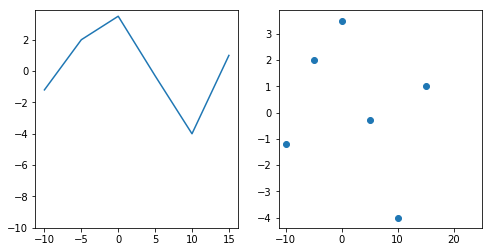

In [67]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

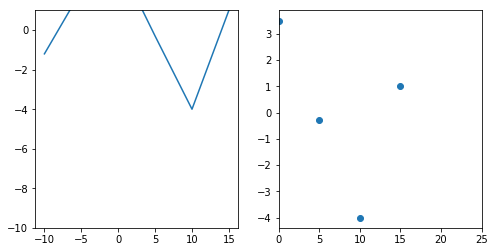

In [68]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
plt.show()

## Dealing with the boundaries: Layout, ticks, spines, etc

One key thing we haven't talked about yet is all of the annotation on the outside of the axes, the borders of the axes, and how to adjust the amount of space around the axes.  We won't go over every detail, but this next section should give you a reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) is often used to help configure your tickers.

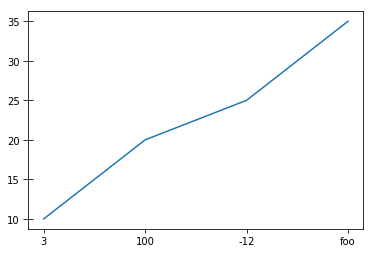

In [43]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 35])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=10)

plt.show()

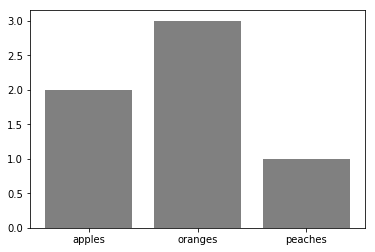

In [70]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)
plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

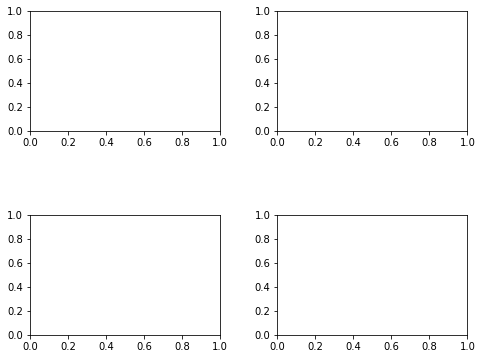

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.3, hspace=0.7,
                    left=0.125, right=0.8,
                    top=0.7,    bottom=0.2)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

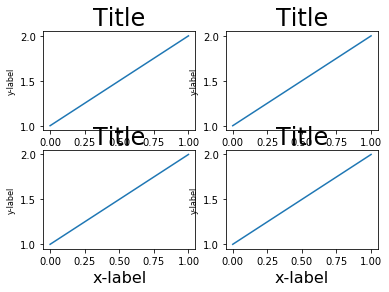

In [72]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

plt.show()

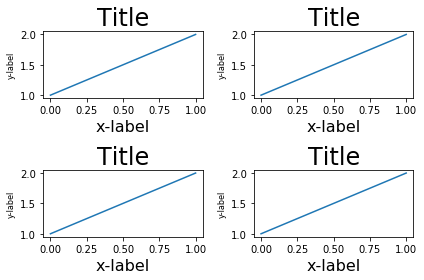

In [73]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Tight layout enabled.
fig.tight_layout()

plt.show()

## Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

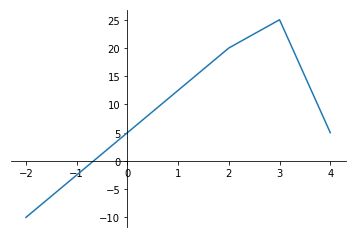

In [74]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
# ax.spines['bottom'].set_position(('axes', 0.75))
# ax.spines['left'].set_position(('axes', 0.3))

plt.show()

# mplot3d
By taking advantage of Matplotlib's z-order layering engine, mplot3d emulates 3D plotting by projecting 3D data into 2D space, layer by layer. While it isn't going to replace any of the true 3D plotting libraries anytime soon, its goal is to allow for Matplotlib users to produce 3D plots with the same amount of simplicity as 2D plots.

In [51]:
%matplotlib widget

In [54]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d'})
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

FigureCanvasNbAgg()

# Further Readings
Matplotlib chapter from Jake VanderPlas's "Python Data Science Handbook" https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

[Matplotlib tutorial from Scipy 2018](https://youtu.be/6gdNUDs6QPc)

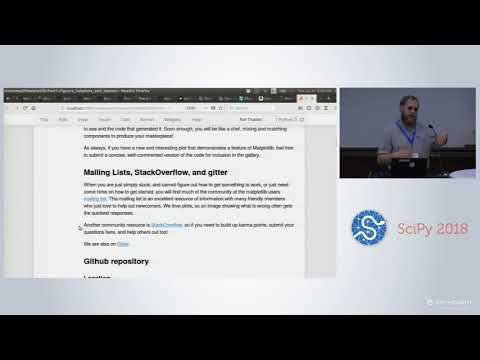

In [55]:
from IPython.display import YouTubeVideo
YouTubeVideo("6gdNUDs6QPc")